This notebook shows how to solve differential equations with analytical and numerical methods, create plots to visualize the solutions, and use loops to perform the calculations.

- Loop
- Solve Ordinary differential equations

This problem explores different methods to solve differential equations. One of the methods will use a loop to calculate the step forward from one time point to calculate the next. A loop is implemented with either for or while.

For Loop: A for loop is used when the number of cycles through the loop are known.

In [200]:
for val in [0,1,2,3,4]:
    print(val)

0
1
2
3
4


In [201]:
for i in [0,1,2,3,4,6,9]:
    print(i)

0
1
2
3
4
6
9


This for loop prints the value of i for each of the values in the list [0,1,2]. Instead of [0,1,2,3,4], the range function can be used to generate the list with range(5)

In [202]:
for i in range(8):
    print(i)

0
1
2
3
4
5
6
7


While Loop: A while loop terminates based on a particular condition that becomes False. If the condition never becomes False then the loop continues forever as an infinite loop.

In [203]:
i = 0
while i<4:
    print(i)
    i += 1

0
1
2
3


- Exampple 1

We can take an example of reaction $A\rightarrow B$ given by

\begin{equation}
\frac{dC_A}{dt}=-\lambda C_A
\end{equation}

where $C_A$ is concentration unit $kmol/m^3$ and $\lambda$ is rate constant. Initial concentration $C_{A0}$ is $7 \,kmol/m^3$ and initial the rate constant $\lambda= 2 s^{-1}$

Now our job is calculate $C_A(t)$ for given time interval. That means we need to perform the integration.

- Analytical Solution to eq.1:

\begin{align*}
\frac{dC_A}{C_A}=-\lambda,dt\\
ln{C_A}=-\lambda\,t+C\tag{2}
\end{align*}

Where C is constant of integration, that can be found using initial conditions.
when $t=0$ ,$\lambda=0,\,C=C0$ and $C_A=C_{A0}$
\begin{align*}
ln{C_{A0}}=C0
\end{align*}

Then eqn.2 becomes, $$ln{\frac{C_A}{C_{A0}}}=-\lambda t$$
$$\boxed{C_A=C_{A0}e^{-\lambda \,t}}\tag{3}$$

Eq.3 is the  analytical solution however we also solve the probelm numerically using Euler Method. 




In [204]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [205]:

def concen_A(C_A0,Lambda,t):
    return C_A0*np.exp(-Lambda*t)

In [206]:
C_A0=7 #kmol/m^3
Lambda=2 #s^{-1}
t=np.linspace(0,20,100) #seconds

$t_i=0$ and $t_f=20$, no of steps is 100. the time interval between two consequitive steps is $$\frac{t_f-t_0}{n}=20/100=0.2$$

- Euler Method Theory: Example

Euler's method is a simple numerical technique to calculate the solution of a differential equation. The Euler method evaluates the rate at time 
 n to solve for the next value of $C_A$ at time n+1. The key for Euler's method is to approximate the derivative value as the finite-difference slope between two successive points of 
$C_A$.

\begin{align*}

\frac{dC_A}{dt}\approx \frac{C_{A,n+1}-C_{A,n}}{t_{n+1}-t_n}\\
-{\lambda \,C_A}\approx \frac{C_{A,n+1}-C_{A,n}}{t_{n+1}-t_n}

\end{align*}

in the above step we have substituted the approximate derivative  into the original differential equation. This equation is then re-arranged to solve for the next concentration $C_{A,n+1}$ based on the current concentration $C_{A,n}$ and the change in time $t_{n+1}-t_n$.

\begin{align*}
C_{A,n+1}=C_{A,n}+(-\lambda C_{A,n})(t_{n+1}-t_n)\\
C_{A,n+1}=C_{A,n}+\frac{dC_{A,n}}{dt}(t_{n+1}-t_n)\\
C_{A,n+1}=C_{A,n}+\frac{dC_{A,n}}{dt}dt\tag{4}
\end{align*}







In [207]:
t_0=0
t_f=20
dt=0.2
time=np.arange(0,20,0.2)
n=len(t)
C_A=np.ones(n)
#C_A=np.zeros_like(time)


for i in range(1,n):
    C_A[i]=C_A[i-1]+(-Lambda*C_A[i-1])*dt

#for i in range(len(time)-1):
    #C_A[i]=C_A[i-1]+(-Lambda*C_A[i-1])*dt

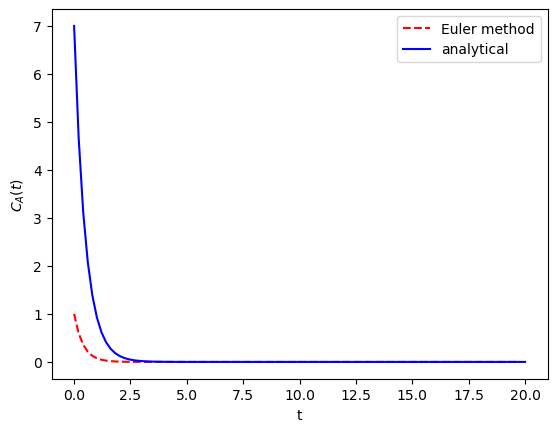

In [208]:
plt.plot(time,C_A, color="red", linestyle="--",label="Euler method")
plt.plot(t,concen_A(C_A0,Lambda,t), color="blue", label="analytical")
plt.xlabel("t")
plt.ylabel(r'$C_A(t)$')
plt.legend()
plt.show()

- Euler Method:  

Let $\frac{dS(t)}{dt}=F(t,S(t))$ is an first ODE. Also, let $t$ be a numerical grid of the interval $[t_0,t_𝑓]$ with spacing $h$. Without loss of generality, we assume that $t_0=0$ and that $t_𝑓=Nh$ for some positive integer, 𝑁. 


The linear approximation of $𝑆(t)$ around $t_j$ at $t_{j+1}$ is

\begin{align*}
S(t_{j+1})=S(t_j)+\frac{dS(t_j)}{dt}(t_{j+1}-t_j)\tag{5}\\
S(t_{j+1})=S(t_j)+F(t_j, S(t_{j}))dt
\end{align*}

It can be seen that eq.4 and eq.5 are same. here dt is step size between two consequitive times $t_j,t_{j+1}$.

- Example 2

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html#:~:text=Let%20dS(t)d,a%20time%20and%20state%20value

The differential eqaution $\frac{df}{dt}=e^{-at}$ with initial condition $f_o=1$. Calculate f in time interval 0 to 1 seconds using step size 0.1 and then compare the approximate solution to the exact.

Eaxct solution: $$\int df=\int e^{-t}dt=ae^{-at}+C$$
at t=0, C=0 and f(t) has the solution of the form, $$f(t)=ae^{-at}$$




Eaxct solution: $$\int df=\int e^{-at}dt=ae^{-at}+C$$
at t=0, C=0 and f(t) has the solution of the form, $$f(t)=ae^{-at}$$

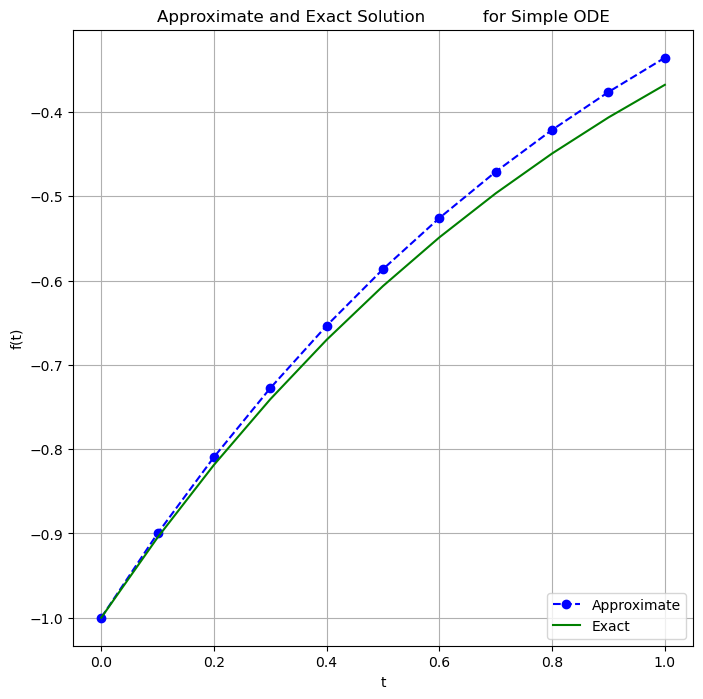

In [209]:

# Define parameters
f = lambda t, s: a*np.exp(-a*t) # ODE
a=1
h = 0.1 # Step size
#h=0.01 # better approximation take smaller value
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize=(8,8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
          for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


- Example 3:

Solving Coupled Differntial equation using Euler Method:

We have the reaction $X\rightarrow Y$ and $U\rightarrow V$ follows the rate equations;

\begin{align*}
& \frac{dX}{dt}=-k_1 X\,Y\\


& \frac{dY}{dt}=-k_1 X\,Y-k_2 Y\,U\\


& \frac{dU}{dt}=k_1 X\,Y-k_2 Y\,U\\


& \frac{dV}{dt}=k_2 Y\,U
\end{align*}

$X,Y,U,V$ are concentrations in mol/lit and $k_1, k_2$ are rate constants with values $1, 1.5\, [lit/mol-s]$. $X_0=Y_0=1, U_0=V_0=0\, [mol/lit]$.
Our job is to solve the above four equations for $X,Y,U,V$ in a time interval of $t=5$ s with step size $h=0.2$ s.

In [210]:
k_1,k_2=1,1.5
X0,Y0,U0,V0=1,1,0,0
t0=0
tf=3
dt=0.2  #stepsize dt=h
t=np.arange(t0,tf,h)
#t=np.linspace(t0,tf,10) #linspace also works well
n=len(t)
print(len(t))

30


In [211]:
#X=np.ones(t) #gives you error "object cannot be interpreted as an integer"

X=np.ones(n) #initiate with initial value 1
Y=np.ones(n) 
U=np.zeros(n) #initiate with intitial value 0
V=np.zeros(n) 

for i in range(1,n):
    X[i]=X[i-1]+(-k_1*X[i-1]*Y[i-1])*dt
    Y[i]=Y[i-1]+(-k_1*X[i-1]*Y[i-1]-k_2*Y[i-1]*U[i-1])*dt
    U[i]=U[i-1]+(k_1*X[i-1]*Y[i-1]-k_2*Y[i-1]*U[i-1])*dt
    V[i]=V[i-1]+(k_2*Y[i-1]*U[i-1])*dt





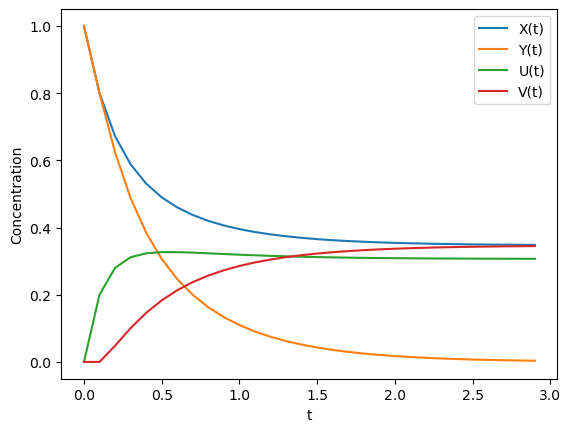

In [212]:
plt.plot(t,X, label='X(t)')
plt.plot(t,Y,label="Y(t)")
plt.plot(t, U, label="U(t)")
plt.plot(t, V,label='V(t)')
plt.legend(loc="best")
plt.xlabel("t")
plt.ylabel("Concentration");


In [215]:
#alternative way to solve, rename the variable to see the change


X_1=np.ones(len(t)) #initiate with initial value 1
Y_1=np.ones(len(t)) 

U_1=np.zeros(len(t)) #initiate with intitial value 0
V_1=np.zeros(len(t)) 

test=[]
for i in range(0,len(t)-1):

    factor_1=(k_1*X_1[i]*Y_1[i])
    factor_2=(k_2*Y_1[i]*U_1[i])
    
    X_1[i+1]=X_1[i]+(-factor_1*dt)
    Y_1[i+1]=Y_1[i]+(-factor_1-factor_2)*dt
    U_1[i+1]=U_1[i]+(factor_1-factor_2)*dt
    V_1[i+1]=V_1[i]+factor_2*dt

'''' if some quantity goes to zero just check it and break the loop'''
#if X_1[i] and Y_1[i] == 0:
        #break
    #else:
        #print(np.array([X_1[i],Y_1[i]]))
        #continue

     


"' if some quantity goes to zero just check it and break the loop"

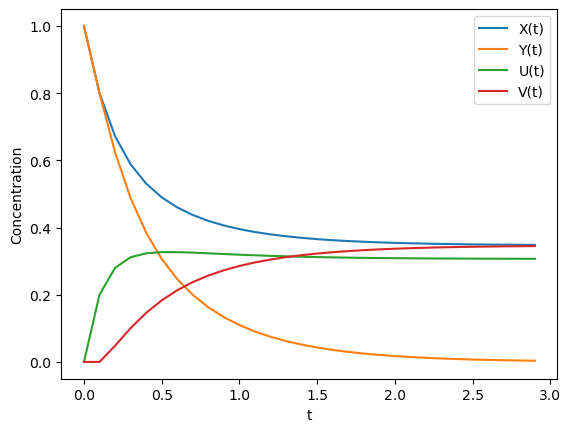

In [217]:
plt.plot(t,X_1, label='X(t)')
plt.plot(t,Y_1,label="Y(t)")
plt.plot(t, U_1, label="U(t)")
plt.plot(t, V_1,label='V(t)')
plt.legend(loc="best")
plt.xlabel("t")
plt.ylabel("Concentration");

In [218]:
#Previuos iteration values and loop termintion example


def relative_error(x_new,x_old):
    return np.abs((x_new-x_old)/x_new)*100



In [219]:
x=200
for i in range(20):
    x=x/2+2
    print(x)


102.0
53.0
28.5
16.25
10.125
7.0625
5.53125
4.765625
4.3828125
4.19140625
4.095703125
4.0478515625
4.02392578125
4.011962890625
4.0059814453125
4.00299072265625
4.001495361328125
4.0007476806640625
4.000373840332031
4.000186920166016


In [220]:
#We want to calculate the relative error let's call the function

for i in range(20):
    x=x/2+2
    err=relative_error(x,x_old) #x_new is x
    print(x) 

4.000093460083008
4.000046730041504
4.000023365020752
4.000011682510376
4.000005841255188
4.000002920627594
4.000001460313797
4.0000007301568985
4.000000365078449
4.000000182539225
4.000000091269612
4.000000045634806
4.000000022817403
4.0000000114087015
4.000000005704351
4.000000002852175
4.000000001426088
4.000000000713044
4.000000000356522
4.000000000178261


In [221]:
'''_old is not defined because in the loop it is taking 
x new values as  102 in the first entry of x, need to initialize x_old values to 0''';

In [225]:
x_old=0

for i in range(20):
    x=x/2+2
    err=relative_error(x,x_old) #x_new is x
    x_old=x
    print(x,err)

4.095703125 100.0
4.0478515625 1.1821471652593487
4.02392578125 0.5945880354325931
4.011962890625 0.2981804904764802
4.0059814453125 0.1493128561416339
4.00299072265625 0.07471220553480216
4.001495361328125 0.03737006276645236
4.0007476806640625 0.01868852333967726
4.000373840332031 0.00934513490369743
4.000186920166016 0.004672785790916676
4.000093460083008 0.0023364474840513617
4.000046730041504 0.00116823738965223
4.000023365020752 0.0005841221067925415
4.000011682510376 0.00029206190639535106
4.000005841255188 0.00014603116644837987
4.000002920627594 7.301563653698281e-05
4.000001460313797 3.650783159670421e-05
4.0000007301568985 1.8253919130407136e-05
4.000000365078449 9.126960398217553e-06
4.000000182539225 4.563480407362301e-06


In [226]:
#now we want to break the loop for certain value of error; let's do that
x=200
x_old=0
tolerance=5  #break when tolerance less than 5%
for i in range(20):
    x=x/2+2
    err=relative_error(x,x_old) #x_new is x
    x_old=x
    print(x,err)
    if err<tolerance:
        break

102.0 100.0
53.0 92.45283018867924
28.5 85.96491228070175
16.25 75.38461538461539
10.125 60.49382716049383
7.0625 43.36283185840708
5.53125 27.683615819209038
4.765625 16.065573770491802
4.3828125 8.73440285204991
4.19140625 4.566635601118359


In [1]:
import math

def rk4_solver(f, y0, t0, tf, h):
    # Runge-Kutta 4th Order Method [By Bottom Science]
    t = t0
    y = y0
    while t <= tf:
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
    return y

import numpy as np

def f(t, y):
    return math.sin(t) - y

y0 = 0
t0 = 0
tf = 10
h = 0.1

y_sol = rk4_solver(f, y0, t0, tf, h)

print("Solution at t = ", tf, " is: ", y_sol)

# OUTPUT - Solution at t =  10  is:  0.07776903758337268

Solution at t =  10  is:  0.07776903758337268
